In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import kernel as krnl
from deflected_subgradient import solveDeflected
from SVR import SVR
from svr_grid_search import Gridsearch
import matplotlib.pyplot as plt
import copy
from svr_grid_search import Gridsearch

In [2]:
def create_kernel(x, kernel, coef, degree, gamma):
    # interface function to get the desired kernel output
    if kernel == 'linear':
        return krnl.linear(x, x)
    elif kernel == 'rbf':
        return krnl.rbf(x, x, gamma)
    elif kernel == 'poly':
        print('hello')
        return krnl.poly(x, x, gamma, degree, coef)
    elif kernel == 'sigmoid':
        return krnl.sigmoid(x, x, gamma, coef)

# method to get the fstar of a sklearn svr model
def sklearn_fstar(x, y, sklearn_model):
    # create a correct betas array, filling with zeros where needed
    betas = np.zeros(sklearn_model.shape_fit_[0])
    dual_coef_iter = 0
    for i in range(sklearn_model.shape_fit_[0]):
        if i in sklearn_model.support_:
            betas[i] = sklearn_model.dual_coef_[0][dual_coef_iter]
            dual_coef_iter += 1
        else:
            betas[i] = 0.0
    betas = np.vstack(betas)
    
    # create kernel
    K = create_kernel(x, sklearn_model.kernel, sklearn_model.coef0, sklearn_model.degree, sklearn_model.gamma)[0]
    
    # calculate as in below formula
    fstar = (0.5 * np.dot(np.dot(np.transpose(betas), K), betas) 
            + sklearn_model.epsilon * np.sum(np.abs(betas))
            - np.transpose(y).dot(betas))
    return fstar
    

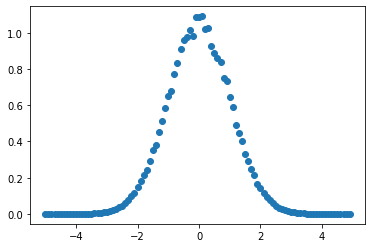

In [3]:
x = np.vstack(np.arange(-5,5,0.1))
noising_factor = 0.1
y = np.array([np.exp(-xi**2/2) for xi in x])
y = np.array([ yi + noising_factor * (np.random.rand()*yi) for yi in y])
plt.scatter(x,y)
plt.show()

In [4]:
tr_x, val_x = x[:len(x)-len(x)//5], x[len(x)-len(x)//5:]
tr_y, val_y = y[:len(y)-len(y)//5], y[len(y)-len(y)//5:]
gs = Gridsearch()
gs.set_parameters(
        kernel=["rbf", "rbf", "rbf"],
        kparam=[{"gamma":3},{"gamma":1},{"gamma":2}],
        box=[0.1,1,10],
        eps=[0.05,0.1,0.5],
        optiargs=[{'eps':1e-2, 'maxiter': 3e3}, {'eps':5e-3, 'maxiter': 3e3}, {'eps':5e-4, 'maxiter': 3e3}, {'eps':1e-2, 'maxiter': 1e3}]
    )
best_coarse_model = gs.run(
    tr_x, tr_y, val_x, val_y
)

print("BEST COARSE GRID SEARCH MODEL:",best_coarse_model)

svr = best_coarse_model
kernel, kparam, optiargs, eps, box  = gs.get_model_perturbations(best_coarse_model, 10, 6)
print(kernel, kparam, optiargs)
gs.set_parameters(
    eps=eps,
    box=box,
    kernel=kernel,
    kparam=kparam,
    optiargs=optiargs
)
best_fine_model = gs.run(
    x, y, val_x, val_y
)
print("BEST FINE GRID SEARCH MODEL:", best_fine_model)

svr = best_fine_model
pred = [float(svr.predict(x[i])) for i in range(x.shape[0])]
print("T LOSS:", svr.eps_ins_loss(y, pred))

pred = [float(svr.predict(val_x[i])) for i in range(val_x.shape[0])]
print("V LOSS:", svr.eps_ins_loss(val_y, pred))

(GS - SVR) - Creating models
(GS - SVR) - Fitting 108 models
(GS - SVR) - model 1/108
Fit time: 5.073994159698486, #SV: 80
	(GS - SVR) - Time taken: 5.073994159698486 - Remaining: 542.917375087738
(GS - SVR) - model 2/108
Fit time: 5.149001359939575, #SV: 80
	(GS - SVR) - Time taken: 10.222995519638062 - Remaining: 541.8187625408173
(GS - SVR) - model 3/108
Fit time: 5.094999551773071, #SV: 77
	(GS - SVR) - Time taken: 15.317995071411133 - Remaining: 536.1298274993896
(GS - SVR) - model 4/108
Fit time: 1.6760010719299316, #SV: 80
	(GS - SVR) - Time taken: 16.993996143341064 - Remaining: 441.8438997268677
(GS - SVR) - model 5/108
Fit time: 4.982017993927002, #SV: 80
	(GS - SVR) - Time taken: 21.977011919021606 - Remaining: 452.7264455318451
(GS - SVR) - model 6/108
Fit time: 5.00898289680481, #SV: 80
	(GS - SVR) - Time taken: 26.986994743347168 - Remaining: 458.7789106369019
(GS - SVR) - model 7/108
Fit time: 5.07901668548584, #SV: 77
	(GS - SVR) - Time taken: 32.067012786865234 - Remai

Fit time: 1.7139999866485596, #SV: 80
	(GS - SVR) - Time taken: 258.16799664497375 - Remaining: 206.534397315979
(GS - SVR) - model 61/108
Fit time: 5.152997255325317, #SV: 79
	(GS - SVR) - Time taken: 263.3209939002991 - Remaining: 202.88666743137796
(GS - SVR) - model 62/108
Fit time: 5.174964427947998, #SV: 80
	(GS - SVR) - Time taken: 268.49595832824707 - Remaining: 199.20667875966717
(GS - SVR) - model 63/108
Fit time: 5.228037595748901, #SV: 76
	(GS - SVR) - Time taken: 273.723995923996 - Remaining: 195.5171399457114
(GS - SVR) - model 64/108
Fit time: 1.716005802154541, #SV: 80
	(GS - SVR) - Time taken: 275.4400017261505 - Remaining: 189.36500118672848
(GS - SVR) - model 65/108
Fit time: 5.200993776321411, #SV: 79
	(GS - SVR) - Time taken: 280.6409955024719 - Remaining: 185.65481240932758
(GS - SVR) - model 66/108
Fit time: 5.18496298789978, #SV: 80
	(GS - SVR) - Time taken: 285.8259584903717 - Remaining: 181.88924631205472
(GS - SVR) - model 67/108
Fit time: 5.347037315368652, 

(GS - SVR) - Fitting 60 models
(GS - SVR) - model 1/60
Fit time: 8.990846872329712, #SV: 100
	(GS - SVR) - Time taken: 8.991843223571777 - Remaining: 530.5187501907349
(GS - SVR) - model 2/60
Fit time: 9.008611917495728, #SV: 97
	(GS - SVR) - Time taken: 18.000455141067505 - Remaining: 522.0131990909576
(GS - SVR) - model 3/60
Fit time: 9.396047592163086, #SV: 100
	(GS - SVR) - Time taken: 27.39650273323059 - Remaining: 520.5335519313812
(GS - SVR) - model 4/60
Fit time: 9.370571851730347, #SV: 100
	(GS - SVR) - Time taken: 36.76707458496094 - Remaining: 514.7390441894531
(GS - SVR) - model 5/60
Fit time: 9.274352073669434, #SV: 100
	(GS - SVR) - Time taken: 46.04242658615112 - Remaining: 506.4666924476623
(GS - SVR) - model 6/60
Fit time: 9.325035572052002, #SV: 100
	(GS - SVR) - Time taken: 55.368462800979614 - Remaining: 498.3161652088166
(GS - SVR) - model 7/60
Fit time: 9.118211030960083, #SV: 100
	(GS - SVR) - Time taken: 64.48767423629761 - Remaining: 488.2638192176819
(GS - SVR

Fit time: 9.45886516571045, #SV: 100
	(GS - SVR) - Time taken: 552.8358628749847 - Remaining: 0.0
(GS - SVR) - Evaluating models
(GS - SVR) - SVR: 0 - TR MEE 0.10000000000000064 - VL MEE 0.07619019371118278 - MODEL: 
Kernel: rbf
Gamma: 1
Intercept: [0.13647571]\Optim_args: {'eps': 0.01, 'maxiter': 3000.0, 'vareps': 0.05}
Box: 1

(GS - SVR) - SVR: 1 - TR MEE 0.1017240575233774 - VL MEE 0.04904938735629403 - MODEL: 
Kernel: rbf
Gamma: 1
Intercept: [0.14010634]\Optim_args: {'eps': 0.005493566170220663, 'maxiter': 3000.0, 'vareps': 0.1}
Box: 1

(GS - SVR) - SVR: 2 - TR MEE 0.10000000000000098 - VL MEE 0.04983264829269829 - MODEL: 
Kernel: rbf
Gamma: 1
Intercept: [0.13755005]\Optim_args: {'eps': 0.06937969858445531, 'maxiter': 3000.0, 'vareps': 0.1}
Box: 1

(GS - SVR) - SVR: 3 - TR MEE 0.10000000000000041 - VL MEE 0.0507853418956523 - MODEL: 
Kernel: rbf
Gamma: 1
Intercept: [0.13723426]\Optim_args: {'eps': 0.09585012813087619, 'maxiter': 3000.0, 'vareps': 0.1}
Box: 1

(GS - SVR) - SVR: 4 - 

In [5]:
import time
start = time.time()
svr = SVR("rbf", {"gamma": 1.1648418883347897}, box=1)
svr.fit(x, y, {'eps': 0.005493566170220663, 'maxiter': 3000.0, 'vareps': 0.1}, optim_verbose=False)
print(f"elapsed time {time.time() - start}")

Fit time: 9.001343011856079, #SV: 100
elapsed time 9.001343011856079


b: [0.14382732]
Gamma: 1.1648418883347897 - Box: 1
PREDICTION (INPUT = 12) [[0.14382732]]
LOSS: [0.43572094]


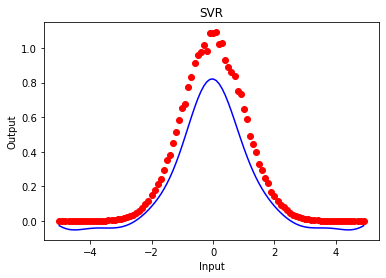

0.8734691385476456

In [6]:
to_predict = 12
pred = svr.predict(to_predict)
print(f"b: {svr.intercept}")
print(f"Gamma: {svr.gamma_value} - Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(y, pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()
r2_score(y, pred)

elapsed time 0.0010046958923339844
 b: [0.28598903]
Gamma: 1.1648418883347897 - Box: 1
PREDICTION (INPUT = 12) [0.28598903]


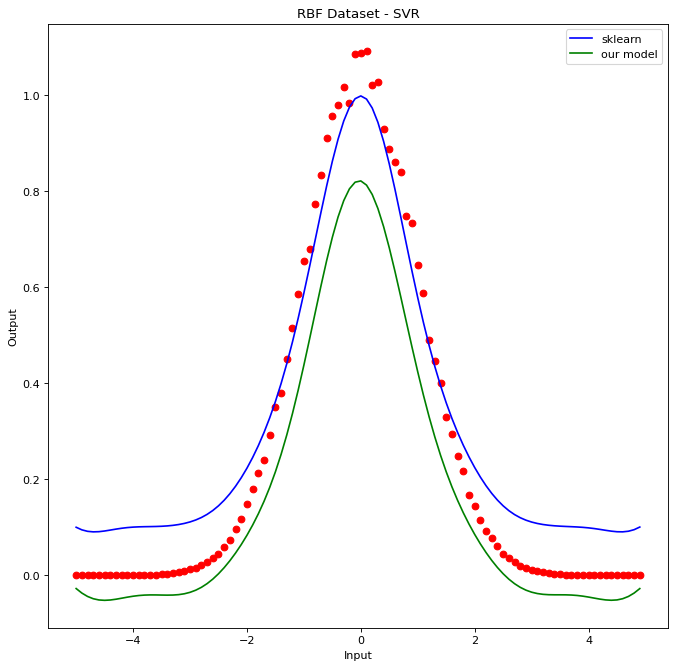

0.9443018532246902

In [7]:
import sklearn.svm as ss

import time
start = time.time()
regressor = ss.SVR(kernel = 'rbf', C=1, epsilon=0.1, max_iter=3000, gamma=1.1648418883347897)

# sc_X = StandardScaler()
# sc_y = StandardScaler()
# xs = sc_X.fit_transform(x)
# ys = sc_y.fit_transform(y)

regressor.fit(x, y.ravel())
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(np.array([[to_predict]]))
print(f" b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
# print(f'PREDICTION (INPUT = {to_predict})', sc_y.inverse_transform(y_pred))
print(f'PREDICTION (INPUT = {to_predict})', y_pred)
sklearn_predict = regressor.predict(x)
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)
plt.scatter(x, y, color = 'red')
plt.plot(x, sklearn_predict, color = 'blue', label='sklearn')
plt.plot(x, pred, color = 'green', label='our model')
plt.title('RBF Dataset - SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
r2_score(y, sklearn_predict)

In [9]:
regressor.support_vectors_

array([[-5. ],
       [-3.9],
       [-3.8],
       [-3.7],
       [-3.2],
       [-3. ],
       [-2.7],
       [-2.4],
       [-0.3],
       [ 0.6],
       [ 2.4],
       [ 2.6],
       [ 2.9],
       [ 3.5],
       [ 3.7],
       [ 3.8],
       [ 4.9]])

In [10]:
regressor.support_

array([ 0, 11, 12, 13, 18, 20, 23, 26, 47, 56, 74, 76, 79, 85, 87, 88, 99])

In [8]:
regressor.dual_coef_

array([[-0.16378505, -0.04777642, -0.05050695, -0.01651762, -0.027262  ,
        -0.00830862, -0.06591628, -0.0455871 ,  0.53623938,  0.30675855,
        -0.03752185, -0.07423431, -0.01115824, -0.04978221, -0.02474155,
        -0.05573076, -0.16416897]])

In [8]:
regressor.epsilon

0.1

In [9]:
regressor.intercept_

array([0.02033234])

In [10]:
params = regressor.get_params()
params['gamma']

0.56

In [11]:
params['C']

1.0

In [8]:
sklearn_fstar(x, y, regressor), svr.history['fstar']

(array([[-0.33459111]]), -0.32011543491280087)